In [67]:
%load_ext autoreload
%autoreload
%matplotlib inline
import rasterio
import sys
sys.path.insert(0, "..")
import src.satellite_analyze
import src.plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load you tiff file

In [68]:
# grab tif
tifffile = '/app/data/raw/athens_satellite.tif'
ds_all = rasterio.open(tifffile)

# Specify some region to plot

In [69]:
# select subset for plotting
r_start = ds_all.height // 2
c_start = ds_all.width // 2
delta = 200
r_end = r_start + delta
c_end = c_start + delta

# Plot it

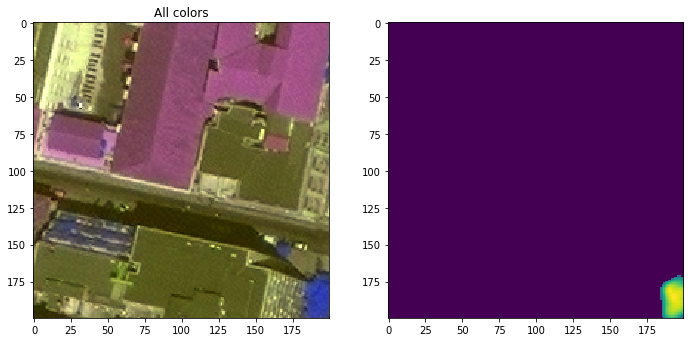

In [70]:
# get the band data
band_data = src.satellite_analyze.get_satellite_subset(ds_all, r_start, r_end, c_start, c_end)
# get tree data
plant_data = src.satellite_analyze.get_tree_finder_image(band_data)
# get peaks
trees_local = src.models.detect_peaks(plant_data)
# plot
src.plot.plot_satellite_image(band_data, plant_data, plot_all=False, tree_loc=None, colorbands=[0,1,3])